In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def repeat_encoding(x, repeats):
    return "".join([bit * repeats for bit in x])


def repeat_decoding(y, repeats):
    decoded = ""
    for i in range(0, len(y), repeats):
        chunk = y[i:i + repeats]
        counts = {"0": 0, "1": 0}
        for bit in chunk:
            counts[bit] += 1
        decoded += max(counts, key=counts.get)
    return decoded

In [3]:
def binary_channel(p):
    def channel(bit):
        return str(int(bit != str(int(random.random() < p))))
    return channel

In [4]:
# задаем параметры
p = 0.3
repeats = 3
message = "1110111000"

# создаем канал
channel = binary_channel(p)
# кодируем сообщение
encoded = repeat_encoding(message, repeats)
# пропускаем код через канал
noisy = "".join([channel(bit) for bit in encoded])
# декодируем зашумленное сообщение
decoded = repeat_decoding(noisy, repeats)

print("Исходное сообщение:", message)
print("Закодированное сообщение:", encoded)
print("Зашумленное сообщение:", noisy)
print("Декодированное сообщение:", decoded)

Исходное сообщение: 1110111000
Закодированное сообщение: 111111111000111111111000000000
Зашумленное сообщение: 111111011000101111001001010001
Декодированное сообщение: 1110110000


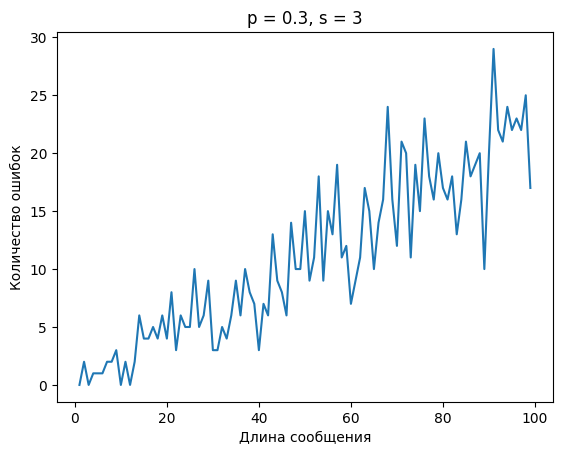

In [5]:
# Задаем параметры
p = 0.3
s = 3

# Создаем канал
channel = binary_channel(p)

# Создаем массивы для хранения данных
n_values = range(1, 100)
num_errors = []

# Вычисляем количество ошибок при разных значениях длины сообщения
for n in n_values:
    message = ''.join(random.choice(['0', '1']) for _ in range(n))
    encoded = repeat_encoding(message, s)
    noisy = ''.join(channel(bit) for bit in encoded)
    decoded = repeat_decoding(noisy, s)
    num_errors.append(sum(a != b for a, b in zip(message, decoded)))

# Строим график зависимости количества ошибок от длины сообщения
plt.plot(n_values, num_errors)
plt.xlabel('Длина сообщения')
plt.ylabel('Количество ошибок')
plt.title(f'p = {p}, s = {s}')
plt.show()


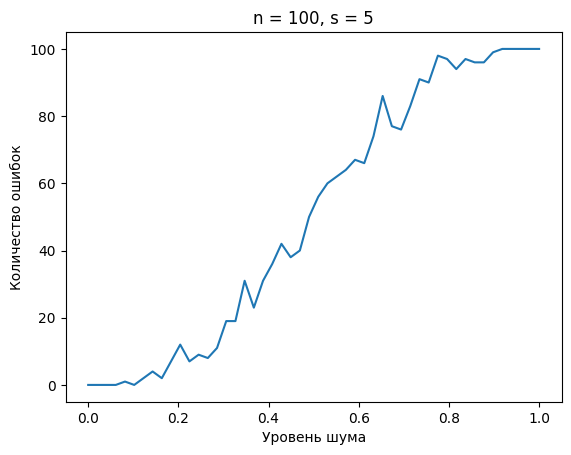

In [6]:
# Задаем параметры
n = 100
s = 5

# Создаем массивы для хранения данных
p_values = np.linspace(0, 1, num=50)
num_errors = []

# Вычисляем количество ошибок при разных значениях уровня шума
for p in p_values:
    channel = binary_channel(p)
    message = ''.join(random.choice(['0', '1']) for _ in range(n))
    encoded = repeat_encoding(message, s)
    noisy = ''.join(channel(bit) for bit in encoded)
    decoded = repeat_decoding(noisy, s)
    num_errors.append(sum(a != b for a, b in zip(message, decoded)))

# Строим график зависимости количества ошибок от уровня шума
plt.plot(p_values, num_errors)
plt.xlabel('Уровень шума')
plt.ylabel('Количество ошибок')
plt.title(f'n = {n}, s = {s}')
plt.show()


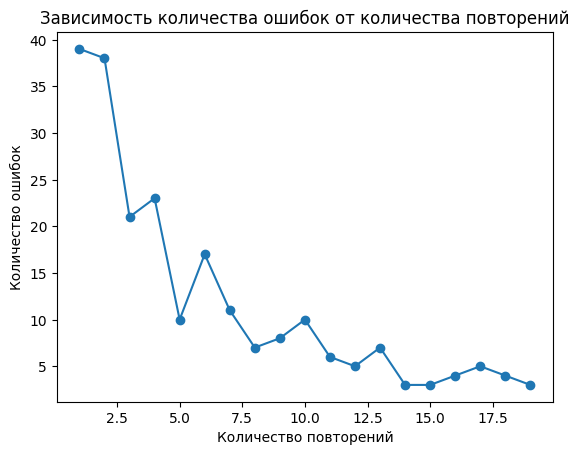

In [7]:
n = 100
p = 0.3
message = "".join([str(random.randint(0, 1)) for _ in range(n)])
# создаем канал
channel = binary_channel(p)
# определяем списки для хранения значений количества ошибок и количества повторений
errors = []
repeats = range(1, 20)
# перебираем значения количества повторений
for s in repeats:
    # кодируем сообщение
    encoded = repeat_encoding(message, s)
    # пропускаем код через канал
    noisy = "".join([channel(bit) for bit in encoded])
    # декодируем зашумленное сообщение
    decoded = repeat_decoding(noisy, s)
    # считаем количество ошибок и добавляем его в список
    error_count = sum([decoded[i] != message[i] for i in range(n)])
    errors.append(error_count)

# строим график
plt.plot(repeats, errors, marker="o")
plt.xlabel("Количество повторений")
plt.ylabel("Количество ошибок")
plt.title("Зависимость количества ошибок от количества повторений")
plt.show()